# 数据挖掘
## 钓鱼网站分析

该数据集为Rami Mustafa、Lee McCluskey和Fadi Thabtah三人于2015年3月26日上传至UCI Machine Learning Repository。
该数据集经久不衰，直到2023年还有研究者在其上测试提出的新钓鱼网站检测模型。
数据集可在  https://archive.ics.uci.edu/ml/datasets/Phishing+Websites  获取。


## 1.数据集分析
对数据集进行基本的分析

In [1]:
from scipy.io import arff
import pandas as pd

df = pd.read_csv('./Training_Dataset.arff.csv')
df.tail(3)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [2]:
print("num of dataset columns: {}".format(len(df.columns)))
df.columns

num of dataset columns: 31


Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

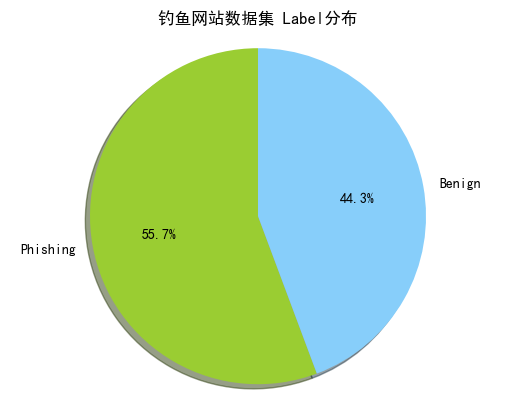

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
line = df['Result'].value_counts()

line = line.tolist()

label = 'Phishing','Benign'
size = line
color = ['yellowgreen','lightskyblue']

plt.pie(size, labels=label, colors=color, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
plt.title('Phishing Dataset Label Distribution')
plt.show()

## 2.数据预处理

由（1）所得，数据较为平衡，不需要进行特殊的采样处理等方式，且都为0、1和-1的离散分布，不需要进行标准化和归一化。

此处删除数据集中存在不妥当之处的“Statistical_report”特征：

In [4]:
df = df.drop("Statistical_report",axis=1)
print("num of dataset columns: {}".format(len(df.columns)))
df.columns

num of dataset columns: 30


Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Result'],
      dtype='object')

删除存在空数据的行

In [ ]:
df.dropna(inplace=True)
df.to_csv('./finished_preprocessing.csv',index=False)

进行k-fold划分

In [6]:
from sklearn.model_selection import KFold

y = df['Result']
y.head(5)

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [7]:
X = df.drop('Result',axis=1)
X.head(5)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,1,-1,-1,-1,-1,1,1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,1,-1,-1,0,-1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,1,-1,1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,1,-1,-1,0,-1,1,1


In [8]:
kf = KFold(n_splits=10, random_state=None, shuffle=False)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [9]:
# statistics
saved_dict = {}

import time

# 3. SVM

In [10]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# svm algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = SVC(kernel='linear', C=1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n f1uracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
print("Time taken:", tt)

saved_dict['SVM_acc'] = aa
saved_dict['SVM_f1'] = af
saved_dict['SVM_time'] = tt


Fold 0: 
 accuracy:0.9240506329113924 
 f1:0.9331210191082803 

Fold 1: 
 accuracy:0.9249547920433996 
 f1:0.9343873517786561 

Fold 2: 
 accuracy:0.9276672694394213 
 f1:0.9344262295081966 

Fold 3: 
 accuracy:0.930379746835443 
 f1:0.9380530973451328 

Fold 4: 
 accuracy:0.9258589511754068 
 f1:0.9365325077399381 

Fold 5: 
 accuracy:0.9384615384615385 
 f1:0.9429530201342282 

Fold 6: 
 accuracy:0.9285067873303168 
 f1:0.9362389023405974 

Fold 7: 
 accuracy:0.9113122171945701 
 f1:0.9233176838810642 

Fold 8: 
 accuracy:0.9248868778280543 
 f1:0.9326845093268451 

Fold 9: 
 accuracy:0.930316742081448 
 f1:0.9381526104417671 

Average accuracy:0.9266395555300991 
 Average f1:0.9349866931604706 

Time taken: 11.663172721862793


# 4. Logistic Regression

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# logistic algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lrg = LogisticRegression()
    lrg.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
print("Time taken:", tt)

saved_dict['LRG_acc'] = aa
saved_dict['LRG_f1'] = af
saved_dict['LRG_time'] = tt

Fold 0: 
 accuracy:0.9240506329113924 
 f1:0.9326923076923076 

Fold 1: 
 accuracy:0.9267631103074141 
 f1:0.9358669833729216 

Fold 2: 
 accuracy:0.9276672694394213 
 f1:0.933993399339934 

Fold 3: 
 accuracy:0.9294755877034359 
 f1:0.9371980676328502 

Fold 4: 
 accuracy:0.9285714285714286 
 f1:0.9387121799844842 

Fold 5: 
 accuracy:0.9420814479638009 
 f1:0.9461279461279462 

Fold 6: 
 accuracy:0.9266968325791856 
 f1:0.9346246973365618 

Fold 7: 
 accuracy:0.9122171945701357 
 f1:0.9240407204385278 

Fold 8: 
 accuracy:0.9266968325791856 
 f1:0.9343065693430656 

Fold 9: 
 accuracy:0.930316742081448 
 f1:0.9381526104417671 

Average accuracy:0.9274537078706848 
 Average f1:0.9355715481710366 

Time taken: 0.8686437606811523


# 5. 随机森林

In [12]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# nb algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 训练模型
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)

    # 预测结果
    y_pred = rfc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['RF_acc'] = aa
saved_dict['RF_f1'] = af
saved_dict['RF_time'] = tt

Fold 0: 
 accuracy:0.9855334538878843 
 f1:0.9870759289176091 

Fold 1: 
 accuracy:0.984629294755877 
 f1:0.9864325618515563 

Fold 2: 
 accuracy:0.9737793851717902 
 f1:0.9762489762489763 

Fold 3: 
 accuracy:0.9855334538878843 
 f1:0.9869494290375205 

Fold 4: 
 accuracy:0.9792043399638336 
 f1:0.982017200938233 

Fold 5: 
 accuracy:0.9746606334841629 
 f1:0.9765886287625417 

Fold 6: 
 accuracy:0.9619909502262444 
 f1:0.9657980456026058 

Fold 7: 
 accuracy:0.9547511312217195 
 f1:0.9607535321821036 

Fold 8: 
 accuracy:0.9647058823529412 
 f1:0.9680589680589681 

Fold 9: 
 accuracy:0.9619909502262444 
 f1:0.9666136724960255 

Average accuracy:0.9726779475178582 
 Average f1:0.975653694409614 



# 6. 梯度提升树回归（GBDT）

In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# nb algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 训练模型
    gbdt = GradientBoostingClassifier(n_estimators=100)
    gbdt.fit(X_train, y_train)

    # 预测结果
    y_pred = gbdt.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['GBDT_acc'] = aa
saved_dict['GBDT_f1'] = af
saved_dict['GBDT_time'] = tt

Fold 0: 
 accuracy:0.9421338155515371 
 f1:0.9488 

Fold 1: 
 accuracy:0.9430379746835443 
 f1:0.9498806682577566 

Fold 2: 
 accuracy:0.945750452079566 
 f1:0.9507389162561577 

Fold 3: 
 accuracy:0.9466546112115732 
 f1:0.9521492295214923 

Fold 4: 
 accuracy:0.9475587703435805 
 f1:0.9546875 

Fold 5: 
 accuracy:0.9647058823529412 
 f1:0.9671440606571188 

Fold 6: 
 accuracy:0.9529411764705882 
 f1:0.9580645161290323 

Fold 7: 
 accuracy:0.9447963800904977 
 f1:0.9521568627450981 

Fold 8: 
 accuracy:0.9393665158371041 
 f1:0.945748987854251 

Fold 9: 
 accuracy:0.9466063348416289 
 f1:0.952988047808765 

Average accuracy:0.9473551913462561 
 Average f1:0.9532358789229671 



# XGBoost

In [63]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# xgb algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = y_train.replace(-1,0)
    y_test = y_test.replace(-1,0)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)  

    param = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'map'
    }


    # 训练模型
    num_round = 100
    bst = xgb.train(param, dtrain, num_round)

    # 预测结果
    y_pred = bst.predict(dtest)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred]

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['XGB_acc'] = aa
saved_dict['XGB_f1'] = af
saved_dict['XGB_time'] = tt

Fold 0: 
 accuracy:0.9556962025316456 
 f1:0.9605157131345688 

Fold 1: 
 accuracy:0.9556962025316456 
 f1:0.9611419508326724 

Fold 2: 
 accuracy:0.9502712477396021 
 f1:0.9546578730420446 

Fold 3: 
 accuracy:0.9566003616636528 
 f1:0.9609756097560976 

Fold 4: 
 accuracy:0.9593128390596745 
 f1:0.965143299767622 

Fold 5: 
 accuracy:0.9656108597285068 
 f1:0.9679595278246206 

Fold 6: 
 accuracy:0.9547511312217195 
 f1:0.9596774193548387 

Fold 7: 
 accuracy:0.9429864253393665 
 f1:0.950896336710834 

Fold 8: 
 accuracy:0.9547511312217195 
 f1:0.9595469255663431 

Fold 9: 
 accuracy:0.9601809954751132 
 f1:0.9651898734177214 

Average accuracy:0.9555857396512646 
 Average f1:0.9605704529407364 



# 7. 朴素贝叶斯

In [14]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# nb algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 创建高斯朴素贝叶斯分类器
    gnb = GaussianNB()

    # 训练模型
    gnb.fit(X_train, y_train)

    # 预测结果
    y_pred = gnb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['NB_acc'] = aa
saved_dict['NB_f1'] = af
saved_dict['NB_time'] = tt

Fold 0: 
 accuracy:0.6021699819168174 
 f1:0.4444444444444445 

Fold 1: 
 accuracy:0.5949367088607594 
 f1:0.4441687344913151 

Fold 2: 
 accuracy:0.6220614828209765 
 f1:0.46954314720812185 

Fold 3: 
 accuracy:0.5886075949367089 
 f1:0.41290322580645167 

Fold 4: 
 accuracy:0.6030741410488246 
 f1:0.4804733727810651 

Fold 5: 
 accuracy:0.6180995475113122 
 f1:0.44473684210526315 

Fold 6: 
 accuracy:0.6018099547511312 
 f1:0.44723618090452266 

Fold 7: 
 accuracy:0.6144796380090498 
 f1:0.48048780487804876 

Fold 8: 
 accuracy:0.5882352941176471 
 f1:0.4021024967148489 

Fold 9: 
 accuracy:0.5927601809954751 
 f1:0.43324937027707816 

Average accuracy:0.6026234524968702 
 Average f1:0.44593456196111597 



# 8. KNN

In [15]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# knn algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn = KNeighborsClassifier()

    # 训练模型
    knn.fit(X_train, y_train)

    # 预测结果
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['KNN_acc'] = aa
saved_dict['KNN_f1'] = af
saved_dict['KNN_time'] = tt

Fold 0: 
 accuracy:0.9638336347197106 
 f1:0.9678456591639871 

Fold 1: 
 accuracy:0.969258589511754 
 f1:0.9728867623604466 

Fold 2: 
 accuracy:0.9475587703435805 
 f1:0.9521452145214522 

Fold 3: 
 accuracy:0.9520795660036167 
 f1:0.9570154095701542 

Fold 4: 
 accuracy:0.9647377938517179 
 f1:0.9695550351288056 

Fold 5: 
 accuracy:0.951131221719457 
 f1:0.9550000000000001 

Fold 6: 
 accuracy:0.9357466063348416 
 f1:0.9426957223567393 

Fold 7: 
 accuracy:0.9230769230769231 
 f1:0.9334377447141738 

Fold 8: 
 accuracy:0.9357466063348416 
 f1:0.9417555373256767 

Fold 9: 
 accuracy:0.9420814479638009 
 f1:0.949044585987261 

Average accuracy:0.9485251159860244 
 Average f1:0.9541381671128697 



# 9. 多层感知机

In [16]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# mlp algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    mlp = MLPClassifier(random_state=1, max_iter=100)

    # 训练模型
    mlp.fit(X_train, y_train)

    # 预测结果
    y_pred = mlp.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['MLP_acc'] = aa
saved_dict['MLP_f1'] = af
saved_dict['MLP_time'] = tt

h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 0: 
 accuracy:0.972875226039783 
 f1:0.9760383386581469 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: 
 accuracy:0.972875226039783 
 f1:0.9764150943396226 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: 
 accuracy:0.9620253164556962 
 f1:0.9654036243822077 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: 
 accuracy:0.9792043399638336 
 f1:0.9814066289409863 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: 
 accuracy:0.969258589511754 
 f1:0.973724884080371 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5: 
 accuracy:0.9665158371040724 
 f1:0.9690376569037658 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 6: 
 accuracy:0.9565610859728507 
 f1:0.961352657004831 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 7: 
 accuracy:0.9438914027149321 
 f1:0.9514106583072099 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8: 
 accuracy:0.96289592760181 
 f1:0.9664758789860997 

Fold 9: 
 accuracy:0.9538461538461539 
 f1:0.9589041095890412 

Average accuracy:0.9639949105250669 
 Average f1:0.9680169531192282 



h:\drawingaienv\torch13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# 10.卷积神经网络（一维卷积）

In [17]:
# constructing dataset
from torch.utils.data import Dataset
class MalDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)



h:\drawingaienv\torch13\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
import pandas as pd
from sklearn.model_selection import KFold
from torch.utils.data import Dataset


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset

import time

df = pd.read_csv('./finished_preprocessing.csv')
kf = KFold(n_splits=10, random_state=None, shuffle=False)
y = df['Result']
X = df.drop('Result',axis=1)


# constructing dataset

class MalDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x.iloc[index], self.y[index]

    def __len__(self):
        return len(self.x)

# initiate model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.conv = nn.Conv1d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.linear = nn.Linear(13 * 32, 20)
        self.linear2 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        x = self.pool(x)
        x = x.view(-1, 13 * 32)
        x = self.linear(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

# loss function
loss_function = nn.BCELoss()

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# cnn network
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"fold:{i}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_set = TensorDataset(torch.from_numpy(X_train.values).type(torch.LongTensor),
                              torch.from_numpy(y_train.values).type(torch.LongTensor))
    test_set = TensorDataset(torch.from_numpy(X_test.values).type(torch.LongTensor),
                             torch.from_numpy(y_test.values).type(torch.LongTensor))

    train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True)
    test_dataloader = DataLoader(test_set, batch_size=32, drop_last=True)


    # 训练模型
    model = BinaryClassifier()
    # network.apply(reset_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(0, 50):
        current_loss = 0
        # train
        for train_data, train_label in train_dataloader:
            train_data = train_data.to(torch.float)
            train_label = train_label.to(torch.float)
            train_label = train_label.view(32,1)
            optimizer.zero_grad()
            output = model(train_data)
            #print(f"output:{output},output_shape:{output.shape}")
            loss = loss_function(output, train_label)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch + 1} loss: {-current_loss / len(train_dataloader):.4f}")

        # evaluate
        output_list = []
        true_list = []
        with torch.no_grad():
            for test_data, test_label in test_dataloader:
                test_data = test_data.to(torch.float)
                test_label = test_label.to(torch.float)
                test_label = test_label.view(32,1)

                output = model(test_data)
                # round the answer and change 0 to -1
                output = torch.round(output)
                output[output==0] = -1

                output_list.append(output)
                true_list.append(test_label)

        pred = torch.cat(output_list,dim=0)
        true = torch.cat(true_list,dim=0)


        accuracy = accuracy_score(pred, true)
        recall = recall_score(pred, true)
        mse_score = mean_squared_error(pred, true)
        f1 = f1_score(pred, true)
        
        if (epoch+1) % 10 == 0:
            print(f"accuracy:{accuracy},recall:{recall},f1:{f1}")

        accuracies.append(accuracy)
        recalls.append(recall)
        mse_scores.append(mse_score)
        f1_scores.append(f1)

    # Saving the model
    save_path = f'./model_saved/cnn/fold_{i}.pth'
    torch.save(model.state_dict(), save_path)

end_time = time.time()


aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['CNN_acc'] = aa
saved_dict['CNN_f1'] = af
saved_dict['CNN_time'] = tt


fold:0
Epoch 10 loss: 15.3503
accuracy:0.8465073529411765,recall:0.9642857142857143,f1:0.8460829493087558
Epoch 20 loss: 18.3851
accuracy:0.8602941176470589,recall:0.9653767820773931,f1:0.8618181818181818
Epoch 30 loss: 20.4598
accuracy:0.8740808823529411,recall:0.9645669291338582,f1:0.8773500447627574
Epoch 40 loss: 22.2567
accuracy:0.8722426470588235,recall:0.97,f1:0.8746618575293057
Epoch 50 loss: 23.6500
accuracy:0.8924632352941176,recall:0.9606741573033708,f1:0.8976377952755905
fold:1
Epoch 10 loss: 15.2541
accuracy:0.8216911764705882,recall:0.962800875273523,f1:0.819366852886406
Epoch 20 loss: 18.6551
accuracy:0.8566176470588235,recall:0.9675456389452333,f1:0.8594594594594596
Epoch 30 loss: 21.3213
accuracy:0.8731617647058824,recall:0.9686888454011742,f1:0.8776595744680852
Epoch 40 loss: 23.0207
accuracy:0.8795955882352942,recall:0.9655172413793104,f1:0.8849868305531169
Epoch 50 loss: 24.4527
accuracy:0.890625,recall:0.9715909090909091,f1:0.8960698689956332
fold:2
Epoch 10 loss: 

# 11. 全连接网络

In [19]:
import pandas as pd
from sklearn.model_selection import KFold
from torch.utils.data import Dataset

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset

import time

df = pd.read_csv('./finished_preprocessing.csv')
kf = KFold(n_splits=10, random_state=None, shuffle=False)
y = df['Result']
X = df.drop('Result', axis=1)


# constructing dataset

class MalDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x.iloc[index], self.y[index]

    def __len__(self):
        return len(self.x)


# initiate model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features=29, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=32)
        self.fc5 = nn.Linear(in_features=32, out_features=1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x = x.unsqueeze(1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x


# loss function
loss_function = nn.BCELoss()

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# cnn network
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"fold:{i}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_set = TensorDataset(torch.from_numpy(X_train.values).type(torch.LongTensor),
                              torch.from_numpy(y_train.values).type(torch.LongTensor))
    test_set = TensorDataset(torch.from_numpy(X_test.values).type(torch.LongTensor),
                             torch.from_numpy(y_test.values).type(torch.LongTensor))

    train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True)
    test_dataloader = DataLoader(test_set, batch_size=32, drop_last=True)

    # 训练模型
    model = BinaryClassifier()
    # network.apply(reset_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(0, 50):
        current_loss = 0
        # train
        for train_data, train_label in train_dataloader:
            train_data = train_data.to(torch.float)
            train_label = train_label.to(torch.float)
            train_label = train_label.view(32, 1)
            # print(f'train_data:{train_data.shape},train_label:{train_label.shape}')
            # print(f'train_data:{train_data},train_label:{train_label}')
            optimizer.zero_grad()

            output = model(train_data)

            # print(f"output:{output},output_shape:{output.shape}")
            loss = loss_function(output, train_label)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch + 1} loss: {-current_loss / len(train_dataloader):.4f}")

        # evaluate
        output_list = []
        true_list = []
        with torch.no_grad():
            for test_data, test_label in test_dataloader:
                test_data = test_data.to(torch.float)
                test_label = test_label.to(torch.float)
                test_label = test_label.view(32, 1)

                # print(test_data,test_label)

                output = model(test_data)
                # round the answer and change 0 to -1
                output = torch.round(output)
                output[output == 0] = -1

                output_list.append(output)
                true_list.append(test_label)

        pred = torch.cat(output_list, dim=0)
        true = torch.cat(true_list, dim=0)

        accuracy = accuracy_score(pred, true)
        recall = recall_score(pred, true)
        mse_score = mean_squared_error(pred, true)
        f1 = f1_score(pred, true)
        if (epoch+1) % 10 == 0:
            print(f"accuracy:{accuracy},recall:{recall},f1:{f1}")

        accuracies.append(accuracy)
        recalls.append(recall)
        mse_scores.append(mse_score)
        f1_scores.append(f1)

    # Saving the model
    save_path = f'./model_saved/cnn/fold_{i}.pth'
    torch.save(model.state_dict(), save_path)

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['FC_acc'] = aa
saved_dict['FC_f1'] = af
saved_dict['FC_time'] = tt

fold:0
Epoch 10 loss: 22.6686
accuracy:0.8722426470588235,recall:0.9718875502008032,f1:0.8744354110207769
Epoch 20 loss: 23.7991
accuracy:0.8722426470588235,recall:0.9625984251968503,f1:0.8755595344673233
Epoch 30 loss: 23.9388
accuracy:0.8786764705882353,recall:0.9685658153241651,f1:0.8819320214669051
Epoch 40 loss: 23.9209
accuracy:0.8823529411764706,recall:0.9546313799621928,f1:0.8875219683655536
Epoch 50 loss: 24.6637
accuracy:0.8841911764705882,recall:0.9565217391304348,f1:0.889279437609842
fold:1
Epoch 10 loss: 23.0107
accuracy:0.8731617647058824,recall:0.9705304518664047,f1:0.8774422735346359
Epoch 20 loss: 24.1585
accuracy:0.8740808823529411,recall:0.9705882352941176,f1:0.8784383318544808
Epoch 30 loss: 24.4372
accuracy:0.8814338235294118,recall:0.9621212121212122,f1:0.8873362445414847
Epoch 40 loss: 24.3526
accuracy:0.8851102941176471,recall:0.9606741573033708,f1:0.891398783666377
Epoch 50 loss: 24.2640
accuracy:0.8832720588235294,recall:0.9622641509433962,f1:0.889276373147340

# 12. BiLSTM

In [20]:
import pandas as pd
from sklearn.model_selection import KFold
from torch.utils.data import Dataset

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
import statistics
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset

import time

df = pd.read_csv('./finished_preprocessing.csv')
kf = KFold(n_splits=10, random_state=None, shuffle=False)
y = df['Result']
X = df.drop('Result', axis=1)


# constructing dataset

class MalDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x.iloc[index], self.y[index]

    def __len__(self):
        return len(self.x)


# initiate model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.bilstm = nn.LSTM(input_size=29, hidden_size=64, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x, _ = self.bilstm(x)
        #x = x[:, -1, :]
        x = self.fc(x)
        x = self.sigmoid(x)
        return x


# loss function
loss_function = nn.BCELoss()

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# cnn network
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"fold:{i}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_set = TensorDataset(torch.from_numpy(X_train.values).type(torch.LongTensor),
                              torch.from_numpy(y_train.values).type(torch.LongTensor))
    test_set = TensorDataset(torch.from_numpy(X_test.values).type(torch.LongTensor),
                             torch.from_numpy(y_test.values).type(torch.LongTensor))

    train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True)
    test_dataloader = DataLoader(test_set, batch_size=32, drop_last=True)

    # 训练模型
    model = BinaryClassifier()
    # network.apply(reset_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(0, 50):
        current_loss = 0
        # train
        for train_data, train_label in train_dataloader:
            train_data = train_data.to(torch.float)
            train_label = train_label.to(torch.float)
            train_label = train_label.view(32, 1)
            # print(f'train_data:{train_data.shape},train_label:{train_label.shape}')
            # print(f'train_data:{train_data},train_label:{train_label}')
            optimizer.zero_grad()

            output = model(train_data)

            # print(f"output:{output},output_shape:{output.shape}")
            loss = loss_function(output, train_label)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch + 1} loss: {-current_loss / len(train_dataloader):.4f}")

        # evaluate
        output_list = []
        true_list = []
        with torch.no_grad():
            for test_data, test_label in test_dataloader:
                test_data = test_data.to(torch.float)
                test_label = test_label.to(torch.float)
                test_label = test_label.view(32, 1)

                # print(test_data,test_label)

                output = model(test_data)
                # round the answer and change 0 to -1
                output = torch.round(output)
                output[output == 0] = -1

                output_list.append(output)
                true_list.append(test_label)

        pred = torch.cat(output_list, dim=0)
        true = torch.cat(true_list, dim=0)

        accuracy = accuracy_score(pred, true)
        recall = recall_score(pred, true)
        mse_score = mean_squared_error(pred, true)
        f1 = f1_score(pred, true)
        if (epoch+1) % 10 == 0:
            print(f"accuracy:{accuracy},recall:{recall},f1:{f1}")

        accuracies.append(accuracy)
        recalls.append(recall)
        mse_scores.append(mse_score)
        f1_scores.append(f1)

    # Saving the model
    save_path = f'./model_saved/cnn/fold_{i}.pth'
    torch.save(model.state_dict(), save_path)

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['BILSTM_acc'] = aa
saved_dict['BILSTM_f1'] = af
saved_dict['BILSTM_time'] = tt

fold:0


h:\drawingaienv\torch13\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 loss: 11.3734
accuracy:0.8658088235294118,recall:0.9602385685884692,f1:0.8687050359712231
Epoch 20 loss: 12.7528
accuracy:0.8887867647058824,recall:0.9552238805970149,f1:0.8943231441048035
Epoch 30 loss: 13.8262
accuracy:0.8869485294117647,recall:0.9550561797752809,f1:0.8923884514435695
Epoch 40 loss: 14.6439
accuracy:0.9071691176470589,recall:0.9535714285714286,f1:0.913601368691189
Epoch 50 loss: 15.3465
accuracy:0.9163602941176471,recall:0.9480968858131488,f1:0.9233361415332771
fold:1


h:\drawingaienv\torch13\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 loss: 11.4380
accuracy:0.8970588235294118,recall:0.9616087751371115,f1:0.9037800687285223
Epoch 20 loss: 12.8939
accuracy:0.8970588235294118,recall:0.9566003616636528,f1:0.9042735042735043
Epoch 30 loss: 13.8692
accuracy:0.9025735294117647,recall:0.9587073608617595,f1:0.909710391822828
Epoch 40 loss: 14.6565
accuracy:0.9099264705882353,recall:0.9576719576719577,f1:0.9172297297297298
Epoch 50 loss: 15.4202
accuracy:0.9053308823529411,recall:0.9589285714285715,f1:0.9124893797790995
fold:2


h:\drawingaienv\torch13\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 loss: 11.3688
accuracy:0.9016544117647058,recall:0.9534450651769087,f1:0.905393457117595
Epoch 20 loss: 12.8231
accuracy:0.9007352941176471,recall:0.956766917293233,f1:0.9040852575488455
Epoch 30 loss: 13.9630
accuracy:0.9044117647058824,recall:0.9588014981273408,f1:0.9078014184397163
Epoch 40 loss: 14.8147
accuracy:0.9227941176470589,recall:0.9586330935251799,f1:0.9269565217391305
Epoch 50 loss: 15.5774
accuracy:0.9117647058823529,recall:0.9628252788104089,f1:0.9151943462897527
fold:3
Epoch 10 loss: 11.3476
accuracy:0.8979779411764706,recall:0.9520295202952029,f1:0.9028871391076115
Epoch 20 loss: 12.7868
accuracy:0.8832720588235294,recall:0.9540229885057471,f1:0.8869100623330365
Epoch 30 loss: 13.8016
accuracy:0.8887867647058824,recall:0.9528301886792453,f1:0.8930150309460655
Epoch 40 loss: 14.6923
accuracy:0.8933823529411765,recall:0.9499072356215214,f1:0.8982456140350877
Epoch 50 loss: 15.5256
accuracy:0.8979779411764706,recall:0.9487179487179487,f1:0.9032258064516129
fold:

h:\drawingaienv\torch13\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 loss: 11.3515
accuracy:0.890625,recall:0.9757009345794393,f1:0.8976784178847808
Epoch 20 loss: 12.8079
accuracy:0.8832720588235294,recall:0.9717514124293786,f1:0.8904227782571184
Epoch 30 loss: 13.8261
accuracy:0.9071691176470589,recall:0.9680284191829485,f1:0.9151973131821999
Epoch 40 loss: 14.7893
accuracy:0.9090073529411765,recall:0.968141592920354,f1:0.9170159262363788
Epoch 50 loss: 15.6158
accuracy:0.8961397058823529,recall:0.9673321234119783,f1:0.9041560644614081
fold:5


h:\drawingaienv\torch13\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 loss: 11.2522
accuracy:0.9108455882352942,recall:0.9690522243713733,f1:0.9117379435850774
Epoch 20 loss: 12.6572
accuracy:0.9172794117647058,recall:0.9712643678160919,f1:0.9184782608695653
Epoch 30 loss: 13.6913
accuracy:0.9273897058823529,recall:0.9648798521256932,f1:0.9296527159394479
Epoch 40 loss: 14.5076
accuracy:0.9310661764705882,recall:0.9634369287020109,f1:0.933569530558016
Epoch 50 loss: 15.3064
accuracy:0.9319852941176471,recall:0.9601449275362319,f1:0.9347442680776015
fold:6
Epoch 10 loss: 11.3681
accuracy:0.8777573529411765,recall:0.9649805447470817,f1:0.8817777777777779
Epoch 20 loss: 12.7998
accuracy:0.8961397058823529,recall:0.9662921348314607,f1:0.9013100436681223
Epoch 30 loss: 13.7961
accuracy:0.8860294117647058,recall:0.9691714836223507,f1:0.8902654867256637
Epoch 40 loss: 14.5743
accuracy:0.9117647058823529,recall:0.9622980251346499,f1:0.9178082191780823
Epoch 50 loss: 15.2461
accuracy:0.9053308823529411,recall:0.9669117647058824,f1:0.9108225108225109
fold

h:\drawingaienv\torch13\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 loss: 11.2800
accuracy:0.9025735294117647,recall:0.9674952198852772,f1:0.9051878354203935
Epoch 20 loss: 12.7960
accuracy:0.9227941176470589,recall:0.9620253164556962,f1:0.926829268292683
Epoch 30 loss: 13.7887
accuracy:0.9227941176470589,recall:0.9603603603603603,f1:0.9269565217391305
Epoch 40 loss: 14.6040
accuracy:0.9264705882352942,recall:0.9622980251346499,f1:0.9305555555555555
Epoch 50 loss: 15.2658
accuracy:0.9338235294117647,recall:0.9611992945326279,f1:0.9380378657487091
fold:9
Epoch 10 loss: 11.3012
accuracy:0.8924632352941176,recall:0.9577205882352942,f1:0.8990509059534082
Epoch 20 loss: 12.8096
accuracy:0.9108455882352942,recall:0.9592198581560284,f1:0.917726887192536
Epoch 30 loss: 13.8461
accuracy:0.9209558823529411,recall:0.9632224168126094,f1:0.9274873524451939
Epoch 40 loss: 14.5968
accuracy:0.9034926470588235,recall:0.9653284671532847,f1:0.9097162510748065
Epoch 50 loss: 15.2958
accuracy:0.9310661764705882,recall:0.9591836734693877,f1:0.9376558603491273
Avera

# 13. 各大算法和模型的效果展示

In [47]:
# saved_dict
# with open('./saved_dict.txt','w',encoding='utf-8') as f:
#     f.write(str(saved_dict))
# f.close()

saved_dict

{'SVM_acc': 0.9266395555300991,
 'SVM_f1': 0.9349866931604706,
 'SVM_time': 11.663172721862793,
 'LRG_acc': 0.9274537078706848,
 'LRG_f1': 0.9355715481710366,
 'LRG_time': 0.8686437606811523,
 'RF_acc': 0.9726779475178582,
 'RF_f1': 0.975653694409614,
 'RF_time': 5.129289150238037,
 'GBDT_acc': 0.9473551913462561,
 'GBDT_f1': 0.9532358789229671,
 'GBDT_time': 7.5479347705841064,
 'NB_acc': 0.6026234524968702,
 'NB_f1': 0.44593456196111597,
 'NB_time': 0.16764497756958008,
 'KNN_acc': 0.9485251159860244,
 'KNN_f1': 0.9541381671128697,
 'KNN_time': 2.7016661167144775,
 'MLP_acc': 0.9639949105250669,
 'MLP_f1': 0.9680169531192282,
 'MLP_time': 33.67609620094299,
 'CNN_acc': 0.8567040441176471,
 'CNN_f1': 0.8482486141237038,
 'CNN_time': 285.33046555519104,
 'FC_acc': 0.8860128676470588,
 'FC_f1': 0.8897957482803794,
 'FC_time': 270.5236985683441,
 'BILSTM_acc': 0.8840165441176471,
 'BILSTM_f1': 0.8785706089361602,
 'BILSTM_time': 3304.6756467819214,
 'SV_acc': 0.9728590248173271,
 'SV_f1'

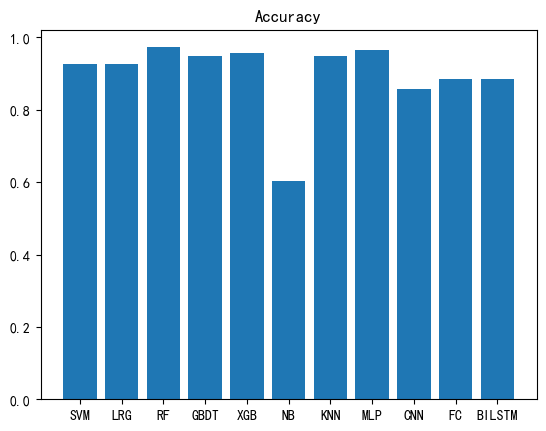

<Figure size 640x480 with 0 Axes>

In [65]:
import numpy as np
acc_list = np.array([saved_dict['SVM_acc'],saved_dict['LRG_acc'],saved_dict['RF_acc'],saved_dict['GBDT_acc'],saved_dict['XGB_acc'],saved_dict['NB_acc'],saved_dict['KNN_acc'],saved_dict['MLP_acc'],saved_dict['CNN_acc'],saved_dict['FC_acc'],saved_dict['BILSTM_acc']])
acc_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM'])
plt.bar(acc_name_list, acc_list)
plt.title('Accuracy')

plt.savefig('pic_saved/Accuracy_barplot.png')
plt.show()

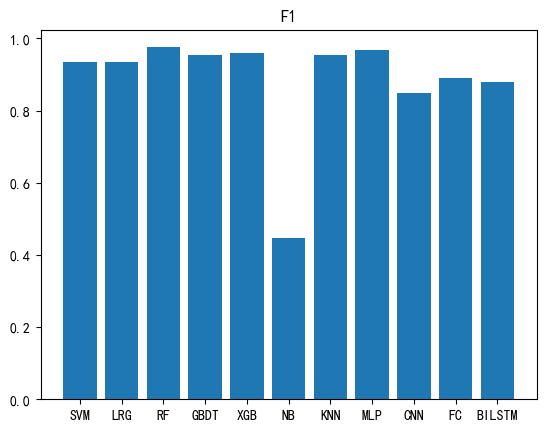

<Figure size 640x480 with 0 Axes>

In [66]:
f1_list = np.array([saved_dict['SVM_f1'],saved_dict['LRG_f1'],saved_dict['RF_f1'],saved_dict['GBDT_f1'],saved_dict['XGB_f1'],saved_dict['NB_f1'],saved_dict['KNN_f1'],saved_dict['MLP_f1'],saved_dict['CNN_f1'],saved_dict['FC_f1'],saved_dict['BILSTM_f1']])
f1_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM'])
plt.bar(f1_name_list, f1_list)
plt.title('F1')

plt.savefig('pic_saved/F1_barplot.png')
plt.show()

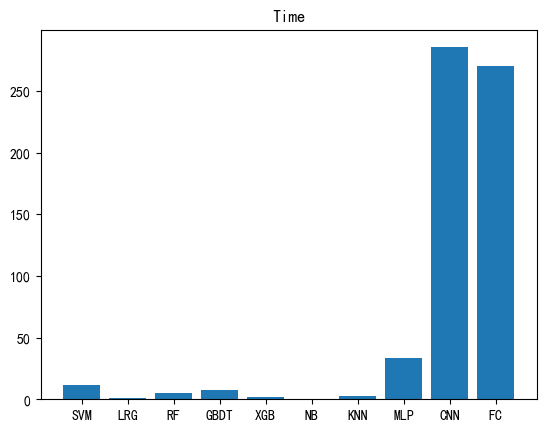

<Figure size 640x480 with 0 Axes>

In [68]:
t_list = np.array([saved_dict['SVM_time'],saved_dict['LRG_time'],saved_dict['RF_time'],saved_dict['GBDT_time'],saved_dict['XGB_time'],saved_dict['NB_time'],saved_dict['KNN_time'],saved_dict['MLP_time'],saved_dict['CNN_time'],saved_dict['FC_time']])
t_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC'])
plt.bar(t_name_list, t_list)
plt.title('Time')
plt.show()
plt.savefig('pic_saved/Time_barplot_without_Bilstm.png')

# 14. 基于高精度机器学习算法的软投票模型
RF,GBDT和XGB精度较高，且训练的时间、硬件成本较低，使用其搭建软投票模型。

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

start_time = time.time()

accuracies = []
recalls = []
mse_scores = []
f1_scores = []

# nb algorithm
for i, (train_index, test_index) in enumerate(kf.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestClassifier(n_estimators=100)
    gbdt = GradientBoostingClassifier(n_estimators=100)
    xgb_model = xgb.XGBClassifier(n_estimators=100)

    # 训练模型
    vc = VotingClassifier(estimators=[('rf', rf), ('gbdt', gbdt), ('xgb', xgb_model)], voting='soft')
    vc.fit(X_train, y_train)
    #rf.fit(X_train,y_train)

    # 预测结果
    y_pred = vc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    mse_scores.append(mse_score)
    f1_scores.append(f1)

    print(f"Fold {i}: \n accuracy:{accuracy} \n f1:{f1} \n")

end_time = time.time()

aa = statistics.mean(accuracies)
af = statistics.mean(f1_scores)
tt = end_time - start_time

print(f"Average accuracy:{aa} \n Average f1:{af} \n")
saved_dict['SV_acc'] = aa
saved_dict['SV_f1'] = af
saved_dict['SV_time'] = tt

Fold 0: 
 accuracy:0.9819168173598554 
 f1:0.9838449111470112 

Fold 1: 
 accuracy:0.9837251356238698 
 f1:0.9856230031948882 

Fold 2: 
 accuracy:0.969258589511754 
 f1:0.971993410214168 

Fold 3: 
 accuracy:0.9828209764918626 
 f1:0.9845402766476811 

Fold 4: 
 accuracy:0.9819168173598554 
 f1:0.9844236760124611 

Fold 5: 
 accuracy:0.9746606334841629 
 f1:0.9764705882352941 

Fold 6: 
 accuracy:0.9647058823529412 
 f1:0.968421052631579 

Fold 7: 
 accuracy:0.9547511312217195 
 f1:0.9607535321821036 

Fold 8: 
 accuracy:0.9656108597285068 
 f1:0.968954248366013 

Fold 9: 
 accuracy:0.9683257918552036 
 f1:0.9721559268098647 

Average accuracy:0.9727692634989731 
 Average f1:0.9757180625441064 



# 15. 效果对比

In [73]:
saved_dict
with open('./saved_dict.txt','w',encoding='utf-8') as f:
    f.write(str(saved_dict))
f.close()

In [5]:
with open('./saved_dict.txt','r',encoding='utf-8') as f:
    saved_dict = eval(f.read())
f.close()
print(type(saved_dict))
saved_dict

<class 'dict'>


{'SVM_acc': 0.9266395555300991,
 'SVM_f1': 0.9349866931604706,
 'SVM_time': 11.663172721862793,
 'LRG_acc': 0.9274537078706848,
 'LRG_f1': 0.9355715481710366,
 'LRG_time': 0.8686437606811523,
 'RF_acc': 0.9726779475178582,
 'RF_f1': 0.975653694409614,
 'RF_time': 5.129289150238037,
 'GBDT_acc': 0.9473551913462561,
 'GBDT_f1': 0.9532358789229671,
 'GBDT_time': 7.5479347705841064,
 'NB_acc': 0.6026234524968702,
 'NB_f1': 0.44593456196111597,
 'NB_time': 0.16764497756958008,
 'KNN_acc': 0.9485251159860244,
 'KNN_f1': 0.9541381671128697,
 'KNN_time': 2.7016661167144775,
 'MLP_acc': 0.9639949105250669,
 'MLP_f1': 0.9680169531192282,
 'MLP_time': 33.67609620094299,
 'CNN_acc': 0.8567040441176471,
 'CNN_f1': 0.8482486141237038,
 'CNN_time': 285.33046555519104,
 'FC_acc': 0.8860128676470588,
 'FC_f1': 0.8897957482803794,
 'FC_time': 270.5236985683441,
 'BILSTM_acc': 0.8840165441176471,
 'BILSTM_f1': 0.8785706089361602,
 'BILSTM_time': 3304.6756467819214,
 'SV_acc': 0.9727692634989731,
 'SV_f1'

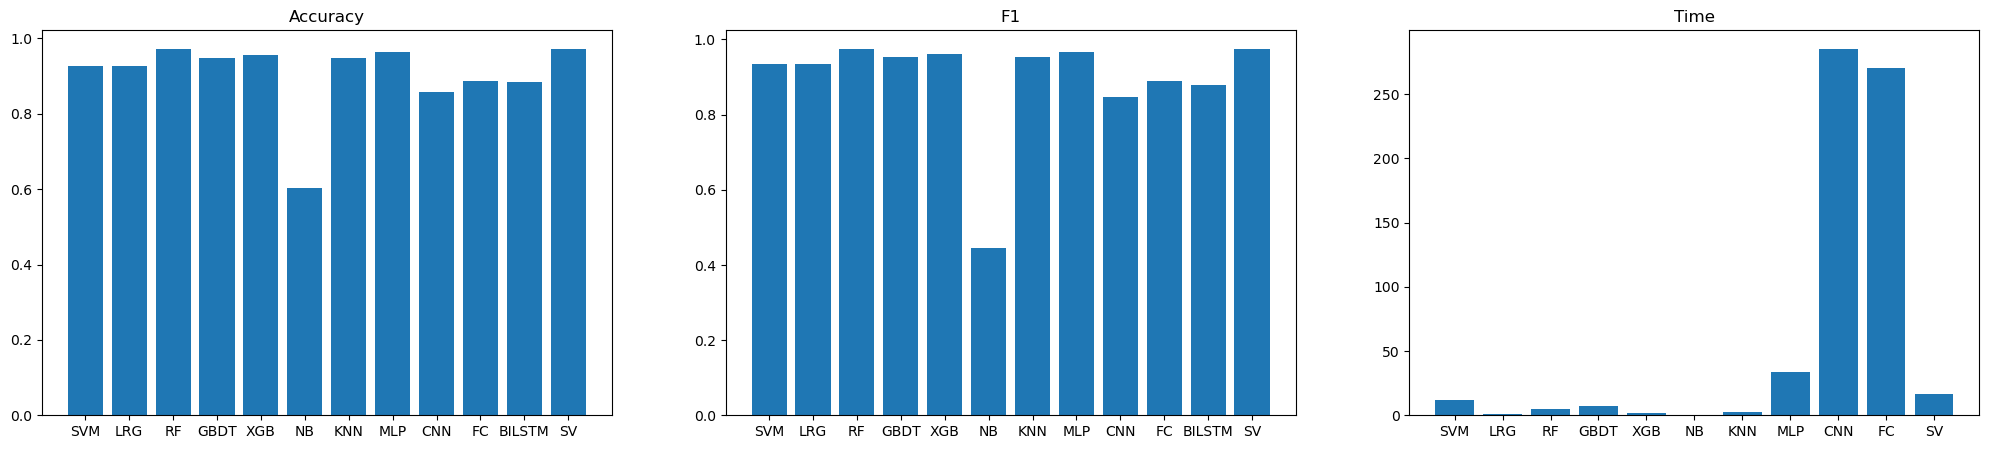

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import numpy as np

acc_list = np.array([saved_dict['SVM_acc'],saved_dict['LRG_acc'],saved_dict['RF_acc'],saved_dict['GBDT_acc'],saved_dict['XGB_acc'],saved_dict['NB_acc'],saved_dict['KNN_acc'],saved_dict['MLP_acc'],saved_dict['CNN_acc'],saved_dict['FC_acc'],saved_dict['BILSTM_acc'],saved_dict['SV_acc']])
acc_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM','SV'])
f1_list = np.array([saved_dict['SVM_f1'],saved_dict['LRG_f1'],saved_dict['RF_f1'],saved_dict['GBDT_f1'],saved_dict['XGB_f1'],saved_dict['NB_f1'],saved_dict['KNN_f1'],saved_dict['MLP_f1'],saved_dict['CNN_f1'],saved_dict['FC_f1'],saved_dict['BILSTM_f1'],saved_dict['SV_f1']])
f1_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM','SV'])
t_list = np.array([saved_dict['SVM_time'],saved_dict['LRG_time'],saved_dict['RF_time'],saved_dict['GBDT_time'],saved_dict['XGB_time'],saved_dict['NB_time'],saved_dict['KNN_time'],saved_dict['MLP_time'],saved_dict['CNN_time'],saved_dict['FC_time'],saved_dict['SV_time']])
t_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','SV'])

fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].bar(acc_name_list, acc_list)
axs[0].set_title('Accuracy')
axs[1].bar(f1_name_list, f1_list)
axs[1].set_title('F1')
axs[2].bar(t_name_list, t_list)
axs[2].set_title('Time')


plt.savefig('pic_saved/ALL_Time_barplot_without_Bilstm.png')
plt.show()

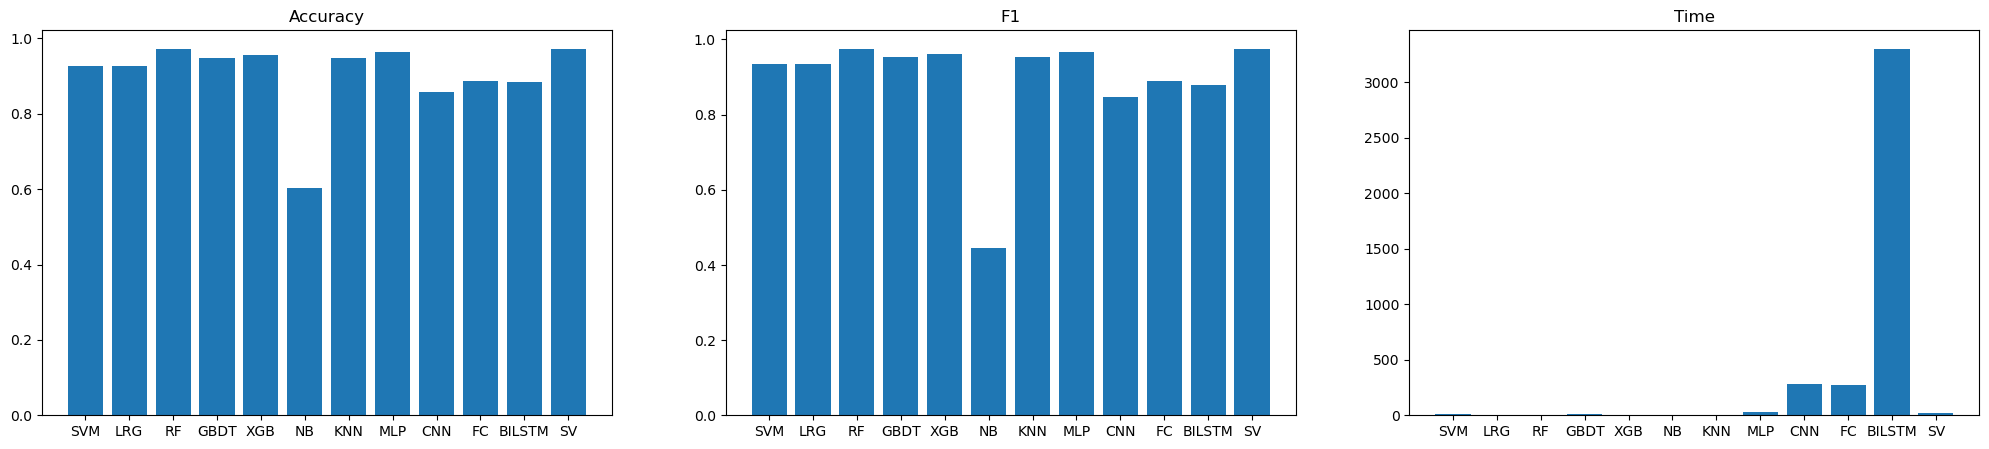

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np

acc_list = np.array([saved_dict['SVM_acc'],saved_dict['LRG_acc'],saved_dict['RF_acc'],saved_dict['GBDT_acc'],saved_dict['XGB_acc'],saved_dict['NB_acc'],saved_dict['KNN_acc'],saved_dict['MLP_acc'],saved_dict['CNN_acc'],saved_dict['FC_acc'],saved_dict['BILSTM_acc'],saved_dict['SV_acc']])
acc_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM','SV'])
f1_list = np.array([saved_dict['SVM_f1'],saved_dict['LRG_f1'],saved_dict['RF_f1'],saved_dict['GBDT_f1'],saved_dict['XGB_f1'],saved_dict['NB_f1'],saved_dict['KNN_f1'],saved_dict['MLP_f1'],saved_dict['CNN_f1'],saved_dict['FC_f1'],saved_dict['BILSTM_f1'],saved_dict['SV_f1']])
f1_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM','SV'])
t_list = np.array([saved_dict['SVM_time'],saved_dict['LRG_time'],saved_dict['RF_time'],saved_dict['GBDT_time'],saved_dict['XGB_time'],saved_dict['NB_time'],saved_dict['KNN_time'],saved_dict['MLP_time'],saved_dict['CNN_time'],saved_dict['FC_time'],saved_dict['BILSTM_time'],saved_dict['SV_time']])
t_name_list = np.array(['SVM','LRG','RF','GBDT','XGB','NB','KNN','MLP','CNN','FC','BILSTM','SV'])

fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].bar(acc_name_list, acc_list)
axs[0].set_title('Accuracy')
axs[1].bar(f1_name_list, f1_list)
axs[1].set_title('F1')
axs[2].bar(t_name_list, t_list)
axs[2].set_title('Time')


plt.savefig('pic_saved/ALL_Time_barplot_with_Bilstm.png')
plt.show()